## 1. WCB Wasafi and Google Trends
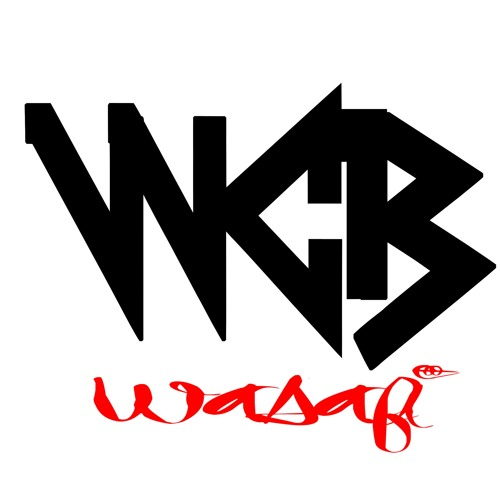

While I'm a fan of the WCB wasafi, the polarizing Label intrigues me. Why? Their marketing prowess. Say what you will about them and what they stand for, they are great at the hype game. Everything they touch turns to content. WCB wasafi was founded by iconic Tanzanian Musician Diamond platnumz, alongside his managers Mkubwa Fella, Babu Tale and Sallam SK. Diamond's managers are top managers in the Tanzanian music indusrty, they successfull manage a lot of artists in the history of the game. These managers as a team they managed to make their artist in top of the game even when big Radio stations in Tanzania stop playing the songs of Diamond platnumz.

The label in particular over the past decade have been especially productive in this regard. Let's get some facts straight. Artists released by the label are Harmonize, Queen Darling, Rayvanny, Lavalava, Rich Mavoko, Mbosso and Zuchu. While Rich Mavoko and Queen Darling were stars before he was signed also Lava lava we failed to get right data for him. we will not consider them in this analysis. Hamronize terminated the contract with WCB at the end of 2019, Rayvanny temirnated the contract with WCB in 2022. The list of WCB wasafi artist, is as follows,

Diamond Platnumz ( His debut was on 2010, song 'Kamwambie')

Harmonize ( He was reseased in 2015, Debut song 'Aiyola')

Rayvanny ( He was reseased in 2016, Debut song 'Kwetu')

Mbosso ( He was reseased in 2018, Debut song 'Watakubali')

Zuchu ( She was reseased in 2020, Debut EP 'I Am Zuchu')

First, let's load and inspect our Google Trends data, which was downloaded in CSV form. The query parameters: each of the wasafi, Tanzania search data, 2010 to present day. (2010 was the year Diamond became "active" according to Wikipedia.)

In [3]:
# load pandas
import pandas as pd

# loading data sets
trends = pd.read_csv('wasafi')
trends.head()

,,,,,Category: All categories
Month,Diamond Platnumz: (Tanzania),Harmonize: (Tanzania),Rayvanny: (Tanzania),Mbosso: (Tanzania),Zuchu: (Tanzania)
2009-01,0,3,0,6,0
2009-02,0,0,0,0,0
2009-03,0,0,0,0,2
2009-04,0,0,0,0,0


## 2. Better rows and columns

In [4]:
# checking the  the number of rows, columns 
trends.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 170 entries, ('Month', 'Diamond Platnumz: (Tanzania)', 'Harmonize: (Tanzania)', 'Rayvanny: (Tanzania)', 'Mbosso: (Tanzania)') to ('2023-01', '28', '29', '15', '10')
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  170 non-null    object
dtypes: object(1)
memory usage: 14.3+ KB


In [5]:
# we have to reset the index
trends.reset_index(inplace = True)
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   level_0                   170 non-null    object
 1   level_1                   170 non-null    object
 2   level_2                   170 non-null    object
 3   level_3                   170 non-null    object
 4   level_4                   170 non-null    object
 5   Category: All categories  170 non-null    object
dtypes: object(6)
memory usage: 8.1+ KB


,level_0,level_1,level_2,level_3,level_4,Category: All categories
0,Month,Diamond Platnumz: (Tanzania),Harmonize: (Tanzania),Rayvanny: (Tanzania),Mbosso: (Tanzania),Zuchu: (Tanzania)
1,2009-01,0,3,0,6,0
2,2009-02,0,0,0,0,0
3,2009-03,0,0,0,0,2
4,2009-04,0,0,0,0,0


In [6]:
# we will drop the first index
trends.drop(index= trends.index[0], axis=0, inplace = True)
trends.head()

,level_0,level_1,level_2,level_3,level_4,Category: All categories
1,2009-01,0,3,0,6,0
2,2009-02,0,0,0,0,0
3,2009-03,0,0,0,0,2
4,2009-04,0,0,0,0,0
5,2009-05,0,0,0,0,0


## 3. Better columns names

So we have a column for each month since January 2010 and a column for the Tanzania search interest for each of the wasafi each month. By the way, Google defines the values of search interest as:

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Okay, that's great Google, but you are not making this data easily analyzable for us. I see a few things. Let's do the column names first. A column named "level_0" is not the most usable for coding purposes. Let's shorten those so we can access their values better. Might as well standardize all column formats, too. I like lowercase, short column names


In [7]:
# Make column names easier to work with
trends.columns= ['month', 'diamond', 'harmonize', 'rayvanny', 'mbosso','zuchu']

In [8]:
# inspect data
trends.head()

,month,diamond,harmonize,rayvanny,mbosso,zuchu
1,2009-01,0,3,0,6,0
2,2009-02,0,0,0,0,0
3,2009-03,0,0,0,0,2
4,2009-04,0,0,0,0,0
5,2009-05,0,0,0,0,0


## 4. Pesky data types

That's better. We don't need to scroll our eyes across the table to read the values anymore since it is much less wide. And seeing five columns that all start with the artists name letter.

The next thing I see that is going to be an issue is that "<" sign. If "a score of 0 means there was not enough data for this term," "<1" must mean it is between 0 and 1 and Google does not want to give us the fraction from google.trends.com for whatever reason. That's fine, but this "<" sign means we won't be able to analyze or visualize our data right away because those column values aren't going to be represented as numbers in our data structure. Let's confirm that by inspecting our data types.

In [9]:
# Inspect data types
trends.info

<bound method DataFrame.info of        month diamond harmonize rayvanny mbosso zuchu
1    2009-01       0         3        0      6     0
2    2009-02       0         0        0      0     0
3    2009-03       0         0        0      0     2
4    2009-04       0         0        0      0     0
5    2009-05       0         0        0      0     0
..       ...     ...       ...      ...    ...   ...
165  2022-09      24        31       17      8    16
166  2022-10      31        32       12     28    41
167  2022-11      26        29       21     28    24
168  2022-12      27        28       21     17    22
169  2023-01      28        29       15     10    14

[169 rows x 6 columns]>

In [10]:
trends.dtypes

month        object
diamond      object
harmonize    object
rayvanny     object
mbosso       object
zuchu        object
dtype: object

## 5. From object to integer

Yes, okay, the diamond, harmonize, rayvanny, mbosso and zuchu columns aren't integers. Again, because of the "<" sign that indicates a search interest value between zero and one. Is this an early hint at the hierarchy of wasafi popularity? We'll see shortly. Before that, we'll need to remove that pesky "<" sign. Then we can change the type of those columns to integer.

In [11]:
# Loop through columns
for column in trends.columns:
    # Only modify columns that have the "<" sign
    if "<" in trends[column].to_string():
        # Remove "<" and convert dtype to integer
        trends[column]=trends[column].str.replace('<', '')
        trends[column]=pd.to_numeric(trends[column])

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 1 to 169
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   month      169 non-null    object
 1   diamond    169 non-null    object
 2   harmonize  169 non-null    int64 
 3   rayvanny   169 non-null    int64 
 4   mbosso     169 non-null    int64 
 5   zuchu      169 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 8.1+ KB


,month,diamond,harmonize,rayvanny,mbosso,zuchu
1,2009-01,0,3,0,6,0
2,2009-02,0,0,0,0,0
3,2009-03,0,0,0,0,2
4,2009-04,0,0,0,0,0
5,2009-05,0,0,0,0,0


In [13]:
# As we can see in diamond column is still object, so we convert to integer
trends['diamond'] = trends['diamond'].astype('int64')
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 1 to 169
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   month      169 non-null    object
 1   diamond    169 non-null    int64 
 2   harmonize  169 non-null    int64 
 3   rayvanny   169 non-null    int64 
 4   mbosso     169 non-null    int64 
 5   zuchu      169 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.1+ KB


## 5. From object to datetime

Okay, great, no more "<" signs. All the sister columns are of integer type.

Now let's convert our month column from type object to datetime to make our date data more accessible.

In [14]:
# Convert month to type datetime
trends.month=pd.to_datetime(trends.month)

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 1 to 169
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      169 non-null    datetime64[ns]
 1   diamond    169 non-null    int64         
 2   harmonize  169 non-null    int64         
 3   rayvanny   169 non-null    int64         
 4   mbosso     169 non-null    int64         
 5   zuchu      169 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 8.1 KB


,month,diamond,harmonize,rayvanny,mbosso,zuchu
1,2009-01-01,0,3,0,6,0
2,2009-02-01,0,0,0,0,0
3,2009-03-01,0,0,0,0,2
4,2009-04-01,0,0,0,0,0
5,2009-05-01,0,0,0,0,0


## 6. Set month as index

And finally, let's set the month column as our index to wrap our data cleaning. Having month as index rather than the zero-based row numbers will allow us to write shorter lines of code to create plots, where month will represent our x-axis.

In [15]:
# Set month as DataFrame index
trends = trends.set_index('month')

# Inspect the data
trends.head()

,diamond,harmonize,rayvanny,mbosso,zuchu
month,,,,,
2009-01-01,0,3,0,6,0
2009-02-01,0,0,0,0,0
2009-03-01,0,0,0,0,2
2009-04-01,0,0,0,0,0
2009-05-01,0,0,0,0,0


## 7. The early Diamond hype

Okay! So our data is ready to plot. Because we cleaned our data, we only need one line of code (and just thirteen characters!) to remake the Google Trends chart, plus another line to make the plot show up in our notebook

As we can see, Diamond released his debut song on 2010, but during the middle of 2011 diamond more started gain searches in google, But we can see in 2013 diamond started to get more hype compared to the past two years. This is because Diamond released two hit songs in that year, plus the quality of the videos were of high quality. He released is first video with Ogopa studios, the song known as 'Kesho'. This video helped Diamond to start gain more fans out of Tanzania and sucessfull get his name on top in East Africa and central. During the same year Diamond released the video of his song known as 'Number one', this song at the time was the hit song in East African and central, he successfully get awards from KTMA and many more international awards such as Channel O awards. Afterwards he reseased a number one remix with nigerian artist Davido, as we can see the rest is history. Afer that remix Diamond he gained more fans in Africa hence his fan base increased to among top artirts in Africa.

<AxesSubplot: xlabel='month'>

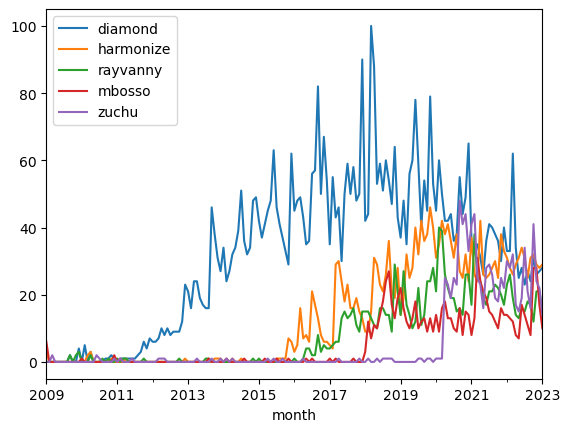

In [16]:
# Plot search interest vs. month
%matplotlib inline
trends.plot()

## 8. Harmonize's rise

Okay There is so much to make sense of here. Diamond's sharp rise in 2011, when he won three awards of Kilimanjaro music awards, among other things. There was no significant search interest for the other four artist until mid-2015 when Harmonize released his debut song Aiyola under Wasafi.

A curious thing starts to happen after that sign as well. Let's zoom in…

<AxesSubplot: xlabel='month'>

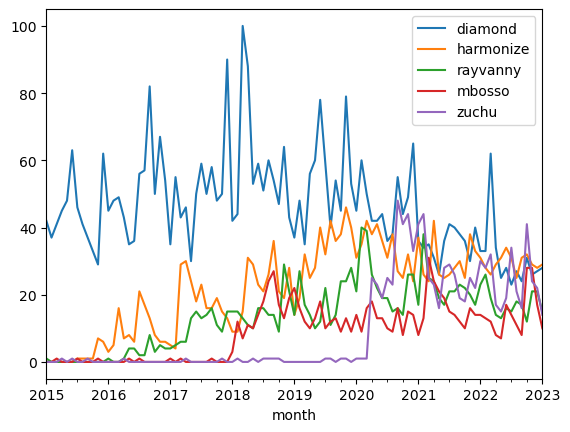

In [17]:
# Zoom in from January 2015
trends.loc['2015-01-01':].plot()

## 9. Smooth out the fluctuations with rolling means

It looks like my suspicion not may be true: Diamond is always the most searched wasafi astist. Since late-2015, no artist other than Diamond was above Harmonize. Until 2021 after female artist Zuchu was successful overtake Harmonize in searches. And During that year Zuchu reased Sukari song which was the hit during that year, and the eefect of that song led Zuchu to overtake Harmonize during that year after 7 years. We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year

<AxesSubplot: xlabel='month'>

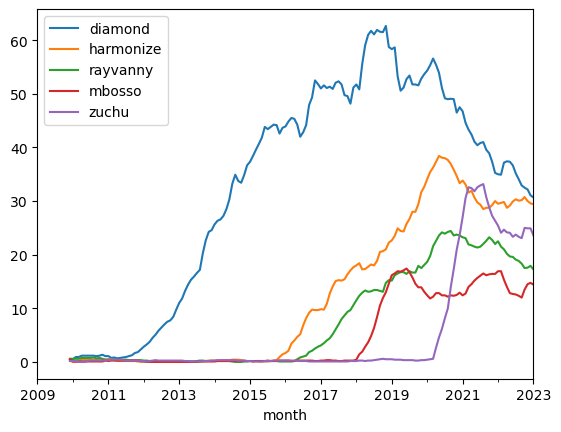

In [18]:
# Smooth the data with rolling means
trends.rolling(window=12).mean().plot()

## 10. Who's more famous? The Wasafi or Harmonize and Rayvanny?

Whoa, okay! So by this metric, Diamond is still the most famous wasafi despite Harmonize being close and nearly taking his crown. Honestly, the biggest takeaway from this whole exercise might be Mbosso not showing up that much. It makes sense, though, despite her wildly successful artist career. Some have called him 'silent killer' since he doesn't have a lot of scandle compared to all other artists, as he tends to shy away from the more dramatic and controversial parts of the media limelight that generate oh so many clicks

Let's end this analysis with one last plot. In it, we will plot (pun!) the Wasafi against the Harmonize and Rayvanny (HR) to see which label line is more popular now. We will use average search interest to make things fair, i.e., total search interest divided by the number of artist in the label and out the label line.

The answer? Since 2015, it has been a toss-up. And in the future? With this family and their penchant for big events, who knows?

<AxesSubplot: xlabel='month'>

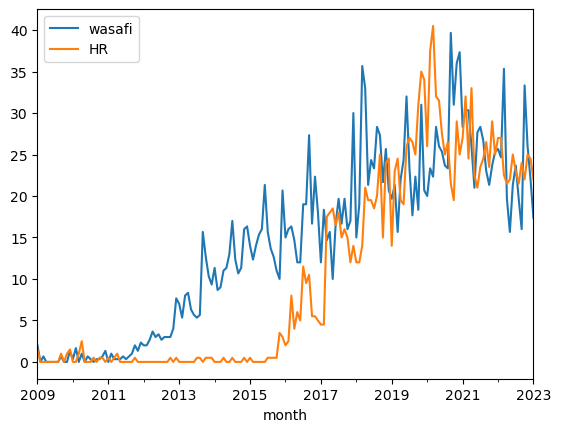

In [19]:
# Average search interest for each family line
trends['wasafi']=(trends.diamond +trends.mbosso+trends.zuchu)/3
trends['HR']= (trends.harmonize+ trends.rayvanny)/2

# Plot average family line search interest vs. month
trends[['wasafi','HR']].plot()